In [1]:
import datetime
import time
import json
import os
import string
import requests
import sys
import traceback

import azure.cosmos.cosmos_client as cosmos_client
import pandas as pd

from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from helpers import keys

In [2]:
gis = GIS('http://esrifederal.maps.arcgis.com', keys.user_name, keys.password)

<Item title:"EmbassyMap" type:Feature Layer Collection owner:OliPhantCE_OCS>
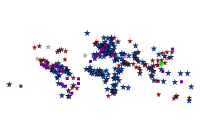

In [3]:
embassy_locations = gis.content.get('e17b84b94cb24fea83bf402b756e4f95')
embassy_locations

In [4]:
flayer = embassy_locations.layers[0]

In [5]:
config = {
    'ENDPOINT': keys.cosmos_uri,
    'PRIMARYKEY': keys.cosmos_primary_key,
    'DATABASE': 'testdb',
    'CONTAINER': 'sample'
}

In [6]:
print("Connecting to Cosmos DB SQL API...")
client = cosmos_client.CosmosClient(url_connection=config['ENDPOINT'], auth={
                                    'masterKey': config['PRIMARYKEY']})

Connecting to Cosmos DB SQL API...


In [7]:
db_id = config['DATABASE']
db_query = "select * from r where r.id = '{0}'".format(db_id)
db = list(client.QueryDatabases(db_query))[0]
db_link = db['_self']

coll_id = config['CONTAINER']
coll_query = "select * from r where r.id = '{0}'".format(coll_id)
coll = list(client.QueryContainers(db_link, coll_query))[0]
coll_link = coll['_self']
coll

{'id': 'sample',
 'indexingPolicy': {'indexingMode': 'consistent',
  'automatic': True,
  'includedPaths': [{'path': '/*',
    'indexes': [{'kind': 'Range', 'dataType': 'Number', 'precision': -1},
     {'kind': 'Range', 'dataType': 'String', 'precision': -1},
     {'kind': 'Spatial', 'dataType': 'Point'}]}],
  'excludedPaths': [{'path': '/"_etag"/?'}]},
 'partitionKey': {'paths': ['/data'], 'kind': 'Hash'},
 'conflictResolutionPolicy': {'mode': 'LastWriterWins',
  'conflictResolutionPath': '/_ts',
  'conflictResolutionProcedure': ''},
 '_rid': 'bvs6AOFWQ3c=',
 '_ts': 1550192881,
 '_self': 'dbs/bvs6AA==/colls/bvs6AOFWQ3c=/',
 '_etag': '"00002900-0000-0000-0000-5c6610f10000"',
 '_docs': 'docs/',
 '_sprocs': 'sprocs/',
 '_triggers': 'triggers/',
 '_udfs': 'udfs/',
 '_conflicts': 'conflicts/'}

In [9]:
docs = client.ReadItems(coll_link)
for item in docs:
    city = item['name']
    df = flayer.query(where="City = '{0}'".format(city)).sdf
    lat = df['Lat'][0]
    long = df['Long_'][0]
    print(long, lat)
    
    cosmos_item = client.CreateItem(coll_link,{
                    'id':item['id'] + "1",
                    'name': item['name'],
                    'lat': lat,
                    'long':long
                        })

-0.0125737 51.508529


In [ ]:
list(docs)